In [0]:
from google.colab import drive
from importlib import reload  # Py3 only; unneeded in py2.

drive = reload(drive)
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls drive/My\ Drive

 CA
'Colab Notebooks'
 dataset-resized.zip
 datasets.zip
 DBMS.gslides
 GPE-practice
 HW1
'Introduction to  Machine Learning  Final Project.gslides'
'ISMCTS PAPER.gslides'
'ML Final Project.gslides'
 Nogo
'palm picture tmp'
 Response3.xlsx
 Response4.xlsx
'Response4.xlsx 的副本'
 SurakartaAI
 備審資料
 光球總驗.mp3
 四系聯合耶舞企劃書.pdf
'左手的掌心照 (File responses)'
 手機相簿
 承遠
'無標題表單 (File responses)'
'爆一 '
 迎宿活動組
'預測成績調查 (File responses)'


In [0]:
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from google.colab import files

In [0]:

from pathlib import Path
from glob2 import glob
import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
import random as ran

# files = zf.ZipFile("./drive/My Drive/dataset-resized.zip",'r')
# files.extractall()
# files.close()
# os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

In [0]:
path_csv = 'drive/My Drive/Response4.xlsx 的副本'
# data_csv = pd.read_csv(path_csv)
data_csv = pd.read_excel(path_csv)
data_csv

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


# downloaded = drive.CreateFile({'id': "1MMvuEKKwJlE8IRabv_3l25Bn9vsrILhp"})


,時間戳記,就讀的學校,第幾類組,平均睡幾個小時,每天花多久時間在休閒娛樂上,每週運動幾次,近視度數,在家裡的排行,翹課堂數/上課堂數,入學管道,喜歡的顏色,家境,如果有打工的話 打工時薪多少,你喜歡自己讀的科系嗎,平均成績％數,左手的掌心照,生理性別,平均每天讀書時間(小時)
0,2019-12-22 22:49:19.746,交大,二類組,6-7小時,4-5小時,4,300.0,2,0.7,學測,粉紅 黑色 白,一般,0,3,71-80%,https://drive.google.com/open?id=1MMvuEKKwJlE8...,男,0.5
1,2019-12-22 22:51:57.299,交通大學,二類組,7-8小時,3-4小時,1,750.0,1,0.8,學測,紫色,一般,200,4,31-40%,https://drive.google.com/open?id=18D5cxSrRsuaM...,NaN,3.0
2,2019-12-22 22:54:00.141,交通大學,二類組,7-8小時,2-3小時,1,450.0,1,0.6,學測,白色 米色 杏色,小康,0,2,51-60%,https://drive.google.com/open?id=11UWapE3_jAv9...,女,1.0
3,2019-12-22 22:56:35.962,交通大學,二類組,7-8小時,1-2小時,2,450.0,1,0.65,學測,深綠,一般,0,3,81-90%,https://drive.google.com/open?id=1t1n6PtBJufTe...,男,1.0
4,2019-12-22 22:59:32.474,交通大學,二類組,6小時以下,4-5小時,2,400.0,2,15/21,指考,藍色,一般,0,2,41-50%,https://drive.google.com/open?id=13pqP81usAEgt...,男,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2019-12-26 12:33:34.495,臺灣大學,二類組,6小時以下,3-4小時,2,800.0,2,0.2,學測,黑色 銀色 藍色,一般,650,3,51-60%,https://drive.google.com/open?id=1g83wRZ6-eJj4...,男,2.0
180,2019-12-26 14:33:31.547,清華大學,三類組,6小時以下,1小時以下,7,100.0,1,0.01,繁星,乳白色,一般,300,5,11-20%,https://drive.google.com/open?id=1RK7YeoPvv_cX...,男,4.0
181,2019-12-26 18:33:54.104,交通大學,二類組,6-7小時,2-3小時,1,1000.0,1,0.8,指考,黑色,一般,160,1,61-70%,https://drive.google.com/open?id=1KutaLDzQe-bJ...,男,1.0
182,2019-12-26 23:29:46.756,佛光大學,一類組,6-7小時,2-3小時,5,0.0,4,0.85,學測,藍色 黑色,一般,0,4,61-70%,https://drive.google.com/open?id=196yDdbn-fEtZ...,男,3.0


In [0]:
data_csv['生理性別'].fillna("男",inplace=True)

In [0]:
# data_csv = data_csv.dro
# data_continuous = data_csv.loc[:,['翹課堂數/上課堂數', '入學管道', '平均成績％數','就讀的學校', '時間戳記', '左手的掌心照', '近視度數', '喜歡的顏色', '每週運動幾次', '如果有打工的話 打工時薪多少', '你喜歡自己讀的科系嗎']]
# print(data_continuous)
unused_feat = ['翹課堂數/上課堂數', '就讀的學校', '時間戳記', '左手的掌心照','喜歡的顏色']
numerical_feat = ['近視度數', '每週運動幾次', '如果有打工的話 打工時薪多少', '你喜歡自己讀的科系嗎', '平均每天讀書時間(小時)']
target_feat = '平均成績％數'

data_drop = data_csv.drop(columns= [target_feat] + unused_feat + numerical_feat)
data_encoding = pd.get_dummies(data_drop)

data_t = pd.concat([data_encoding, data_csv.loc[:, numerical_feat]], axis=1)
data_t

,在家裡的排行,第幾類組_一類組,第幾類組_三類組,第幾類組_二類組,平均睡幾個小時_10-11小時,平均睡幾個小時_11小時以上,平均睡幾個小時_6-7小時,平均睡幾個小時_6小時以下,平均睡幾個小時_7-8小時,平均睡幾個小時_8-9小時,每天花多久時間在休閒娛樂上_1-2小時,每天花多久時間在休閒娛樂上_1小時以下,每天花多久時間在休閒娛樂上_2-3小時,每天花多久時間在休閒娛樂上_3-4小時,每天花多久時間在休閒娛樂上_4-5小時,每天花多久時間在休閒娛樂上_5-6小時,每天花多久時間在休閒娛樂上_6小時以上,入學管道_SAT,入學管道_個申,入學管道_學測,入學管道_指考,入學管道_特殊選材,入學管道_獨招,入學管道_獨立考試,入學管道_申請,入學管道_研究所考試,入學管道_統測,入學管道_統測分發,入學管道_統測登分,入學管道_統測登記分發,入學管道_繁星,入學管道_車隊幹部,家境_一般,家境_富有,家境_小康,家境_清寒,家境_貧窮,生理性別_女,生理性別_男,近視度數,每週運動幾次,如果有打工的話 打工時薪多少,你喜歡自己讀的科系嗎,平均每天讀書時間(小時)
0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,300.0,4,0,3,0.5
1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,750.0,1,200,4,3.0
2,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,450.0,1,0,2,1.0
3,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,450.0,2,0,3,1.0
4,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,400.0,2,0,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,800.0,2,650,3,2.0
180,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,100.0,7,300,5,4.0
181,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1000.0,1,160,1,1.0
182,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,5,0,4,3.0


In [0]:
print(data_csv['平均睡幾個小時'])

0      6-7小時
1      7-8小時
2      7-8小時
3      7-8小時
4      6小時以下
       ...  
179    6小時以下
180    6小時以下
181    6-7小時
182    6-7小時
183    6-7小時
Name: 平均睡幾個小時, Length: 184, dtype: object


[7 3 5 8 4 4 7 2 5 9 3 3 8 9 5 4 6 2 6 4 3 8 1 1 7 0 1 2 0 8 9 2 1 4 0 1 4
 3 4 2 8 2 1 4 1 3 6 1 4 4 7 1 3 0 0 6 4 1 4 7 8 7 8 7 5 5 5 4 3 6 1 3 6 3
 7 0 0 4 7 0 6 6 5 8 8 8 9 9 9 2 9 9 9 4 2 9 0 5 5 6 2 1 1 2 7 3 4 3 2 0 6
 4 1 0 2 2 9 2 0 3 6 4 1 3 5 5 3 2 5 4 1 0 3 0 2 2 3 3 2 0 0 1 2 1 4 0 3 3
 3 5 6 2 4 6 9 4 1 2 1 3 2 7 5 6 8 7 2 6 1 0 3 0 9 3 0 4 1 9 3 5 1 6 6 7]


Text(0, 0.5, 'degree of like')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


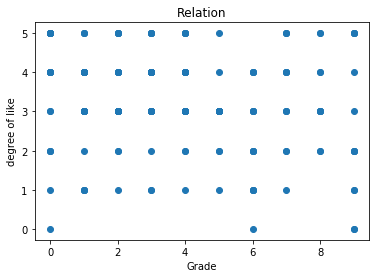

In [0]:
from pylab import *

mpl.rcParams['font.sans-serif'] = ['SimHei']

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

labelencoder.fit(list(data_csv['平均成績％數']))
u = labelencoder.transform(data_csv['平均成績％數'])
print(u)
# labelencoder.fit(list(data_csv['你喜歡自己讀的科系嗎']))
# v = labelencoder.transform(data_csv['每天花多久時間在休閒娛樂上'])
# print(v)
# scatter the sepal_length against the sepal_width
ax.scatter(u, data_csv['你喜歡自己讀的科系嗎'])
# ax.hist(data_csv['平均每天讀書時間(小時)'], facecolor='orange')
# ax.hist(u, facecolor='orange')

# set a title and labels
ax.set_title('Relation')
ax.set_xlabel('Grade')
ax.set_ylabel('degree of like')


In [0]:
from sklearn.preprocessing import LabelEncoder
data_te = data_csv[target_feat]
# print(data_te)
y = []
for i in range(data_te.shape[0]):
    # print(data_te[i])
    if data_te[i]=='0-10%' or data_te[i]=='11-20%' or data_te[i]=='21-30%' or data_te[i]=='31-40%':
        y.append(0)
    else:
        y.append(1);
# labelencoder.fit(list(data_te.values))
# y = labelencoder.transform(data_te)
y = np.array(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1])

In [0]:
from sklearn.model_selection import train_test_split

X = data_t
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [0]:
print(X_train)

     在家裡的排行  第幾類組_一類組  第幾類組_三類組  ...  如果有打工的話 打工時薪多少  你喜歡自己讀的科系嗎  平均每天讀書時間(小時)
152       1         1         0  ...             760           5           1.0
116       1         0         1  ...             800           1           1.0
154       1         0         0  ...             450           1           0.0
12        1         0         0  ...               0           2           3.0
171       1         1         0  ...             150           5           1.0
..      ...       ...       ...  ...             ...         ...           ...
133       1         0         0  ...               0           1           3.0
137       3         1         0  ...             150           4           4.0
72        2         1         0  ...             150           4           1.0
140       2         0         0  ...               0           4           4.0
37        1         0         0  ...               0           4           2.0

[123 rows x 44 columns]


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100)

clf = clf.fit(X_train, y_train) # train model
Pred_x = clf.predict(X_test) # predict model
yy = clf.predict_proba(X_test) # probability of each class

In [0]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()


In [0]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [0]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf = clf.fit(X_train, y_train) # train model
Pred_x = clf.predict(X_test) # predict model
yy = clf.predict_proba(X_test) # probability of each class

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
imp = clf.feature_importances_
# sort(imp)
# print(imp)
plt.title('feature importance')

plt.bar(['study time', 'nearsighted', 'degree', 'sport', 'money'], [0.288692, 0.1, 0.07, 0.07, 0.05], color='red')
plt.figure(figsize=(20,4))
plt.show()

AttributeError: ignored

In [0]:
yy

array([[0.11, 0.89],
       [0.71, 0.29],
       [0.36, 0.64],
       [0.64, 0.36],
       [0.84, 0.16],
       [0.69, 0.31],
       [0.67, 0.33],
       [0.61, 0.39],
       [0.68, 0.32],
       [0.52, 0.48],
       [0.31, 0.69],
       [0.14, 0.86],
       [0.63, 0.37],
       [0.23, 0.77],
       [0.53, 0.47],
       [0.54, 0.46],
       [0.26, 0.74],
       [0.84, 0.16],
       [0.67, 0.33],
       [0.78, 0.22],
       [0.53, 0.47],
       [0.72, 0.28],
       [0.17, 0.83],
       [0.68, 0.32],
       [0.61, 0.39],
       [0.68, 0.32],
       [0.69, 0.31],
       [0.83, 0.17],
       [0.64, 0.36],
       [0.19, 0.81],
       [0.22, 0.78],
       [0.35, 0.65],
       [0.59, 0.41],
       [0.7 , 0.3 ],
       [0.82, 0.18],
       [0.71, 0.29],
       [0.09, 0.91],
       [0.45, 0.55],
       [0.2 , 0.8 ],
       [0.68, 0.32],
       [0.75, 0.25],
       [0.37, 0.63],
       [0.4 , 0.6 ],
       [0.83, 0.17],
       [0.1 , 0.9 ],
       [0.7 , 0.3 ],
       [0.22, 0.78],
       [0.53,

[[26  5]
 [ 8 22]]


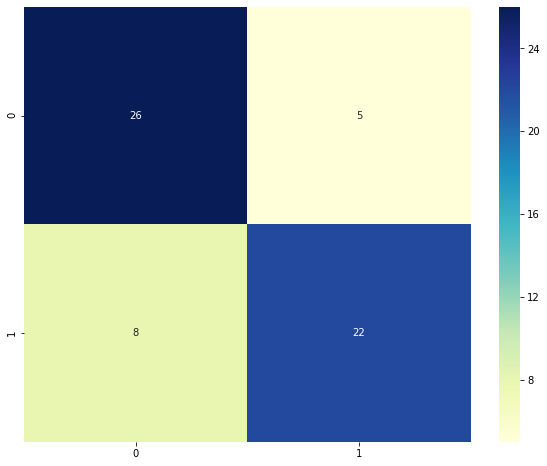

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, Pred_x)
print(cm)
df_cm = pd.DataFrame(cm,[0, 1],[0, 1])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")


In [0]:
correct = 0
total = len(Pred_x)

for i in range(total):
    if Pred_x[i]==y_test[i]:
        correct+=1
print(correct / total)

0.7868852459016393


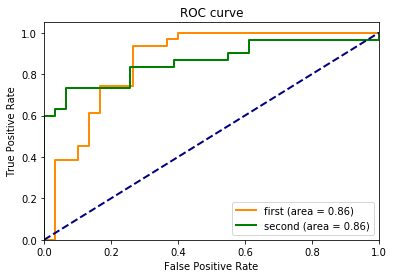

In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
import numpy as np
from sklearn import metrics

# print(y)
y_ = pd.get_dummies(y_test)
# print(y_)
# print(y_)
# print(y_.iloc[:,1])
# print(preds[0][:])
# print(preds[0][:,0])
# print(y_.iloc[:,0])

for i in range(2):
    fpr[i], tpr[i], _ = metrics.roc_curve( y_.iloc[:,i], yy[:,i] ) 
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure()
lw = 2
col = ['darkorange', 'green', 'red']
name = ['first', 'second']
plt.plot(fpr[0], tpr[0], color=col[0], lw=lw, label='first (area = %0.2f)' % roc_auc[i])
plt.plot(fpr[1], tpr[1], color=col[1], lw=lw, label='second (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()